<a href="https://colab.research.google.com/github/Sam-MARTis/AE244_Airfoil-Simulation/blob/main/AE244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#generation of m and p by 4digit naca number as input
def naca_camber(naca_number):
  m = int(naca_number[0])/100 # max camber
  p = int(naca_number[1])*10/100 #max camber position
  return m, p

#camberplot function taking max camber and camber position as argument
def pointplot(x , m , p):
  yc = np.where(x < p,
                (m / p**2)*((2*p*x - x**2)),
                (m/(1-p)**2)*((1-2*p) + (2*p*x)- (x**2)))
  return yc

In [30]:
# function for generating 5 digit naca number
def pointplot_5digit(x, k1, r):
  yc = np.zeros_like(x, dtype = float)
  for i in range(len(x)):
   if x[i] < r:
     yc[i] = (k1/6)*((x[i]**3) - (3*r*(x[i]**2)) + (r**2) * ((3-r)* x[i]))
   else:
     yc[i] = ((k1* r**3)/ 6)*(1- x[i])
  return yc

In [31]:
# function for any polynomial, trignometric function
def random_function(x, expr):
  yc = np.zeros_like(x, dtype=float)
  if i in range(len(x)):
    yc = eval(expr)
  return yc

In [32]:
#function for computing slope
def point_slope(x , yc):
    slope = []
    for i in range(len(x)-1):
      slope.append((np.array(yc)[i+1] - np.array(yc)[i])/ (np.array(x)[i+1] - np.array(x)[i]))
    return slope

In [33]:
#for computing A0 and cl

def A0(alpha, integral_value):
    return alpha - (1/np.pi)*integral_value

#function for calculating cl
def coefficient_of_lift(a0, a1):
    return np.pi*(2*a0 + a1)

In [43]:
# Velocity vector field plot

def summation(a_n, x): #for summation of term a_n*sin(n*theta)
 total = []
 for n in range(1, len(a_n) + 1):
  theta = np.arccos(1-2*x)
  total.append(np.array(a_n)[n-1]*np.sin(n*theta))
 return np.sum(np.array(total))

#function for calulation of circulation distribution function
def calculate_gamma(x, U, a0, a_n, index_of_degree):
  return (2 * U*( np.sqrt(1-x/x)*np.array(a0)[index_of_degree] + summation(a_n, x))) # gamma = 2* U * sqrt(1-x/x) * a0 + summation of a_n* sin(n * theta)

#function for calculation velocity induced at a distance from point vortex from camber
def velocity_component(gamma, x, x_plot, y_plot, u, v):
 for i in range(len(x)-1):
  r_x = x_plot - x[i] #distance from velocity induced point from point vortex at x
  r_y = y_plot - yc[i] #distance from velocity induced point from point vortex at y
  r_sq = r_x**2 + r_y**2
  dx = x[i+1] - x[i]
  r_sq[r_sq == 0] = 1e-10
  v_induced = -gamma[i] * r_x * dx/ (2 * np.pi * r_sq) #u velocity induced by each point vortex at a distance over the grid points
  u_induced = gamma[i] * r_y * dx/ (2 * np.pi * r_sq)  #v velocity induced by each point vortex at a distance over the grid points
  u = u + u_induced
  v = v + v_induced
 return u , v

In [35]:
#function for calculating circulation over the thin airfoil
def circulation(gamma, x):
 return trapezoid(np.array(gamma), x) # line integral of gamma

#function for calculating circulation over thin airfoil
def circulation_velocity(r, u, v, theta):
  return trapezoid((-(u*r*np.cos(theta)) + (r*v*np.sin(theta))), theta ) # line integral of velocity induced

NACA 4 DIGIT or NACA 5 DIGIT or polynomial function?, if NACA 4 DIGIT press 1; if NACA 5 DIGIT press 2; if polynomial press 31
NACA NUMBER:4311
number of points:1000


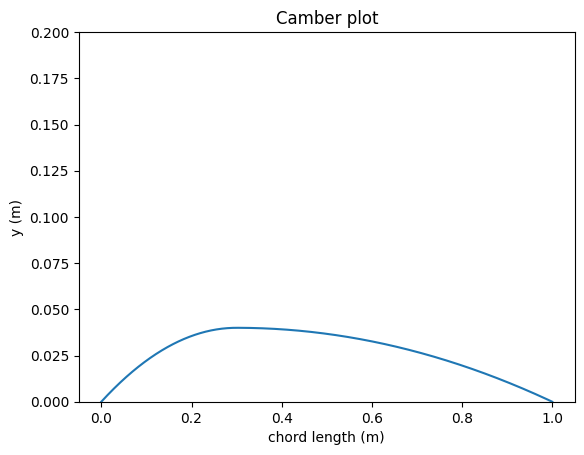

slope: [0.26622177724404406, 0.2653319985765766, 0.26444221990910916, 0.2635524412416417, 0.2626626625741743, 0.2617728839067065, 0.2608831052392392, 0.2599933265717718, 0.25910354790430445, 0.2582137692368364, 0.2573239905693697, 0.25643421190190174, 0.2555444332344346, 0.254654654566967, 0.2537648758994994, 0.2528750972320327, 0.25198531856456385, 0.25109553989709715, 0.25020576122962956, 0.24931598256216286, 0.24842620389469441, 0.24753642522722685, 0.24664664655976012, 0.24575686789229256, 0.24486708922482414, 0.2439773105573574, 0.2430875318898907, 0.2421977532224214, 0.2413079745549564, 0.24041819588748625, 0.23952841722002038, 0.2386386385525537, 0.23774885988508263, 0.23685908121761776, 0.23596930255015094, 0.2350795238826825, 0.23418974521521418, 0.2332999665477491, 0.2324101878802789, 0.23152040921281566, 0.23063063054534388, 0.22974085187787704, 0.22885107321041034, 0.22796129454294378, 0.2270715158754752, 0.22618173720800847, 0.2252919585405402, 0.22440217987307332, 0.22351

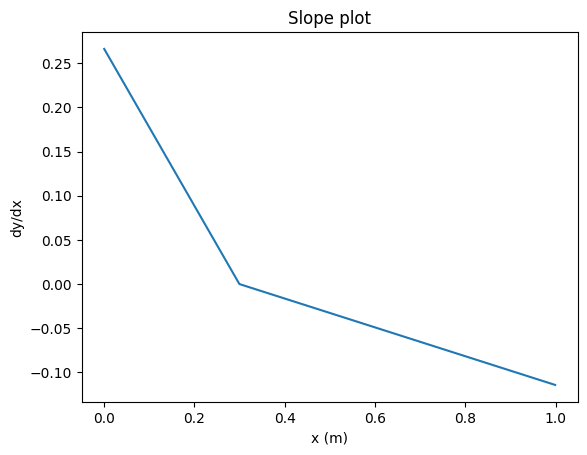

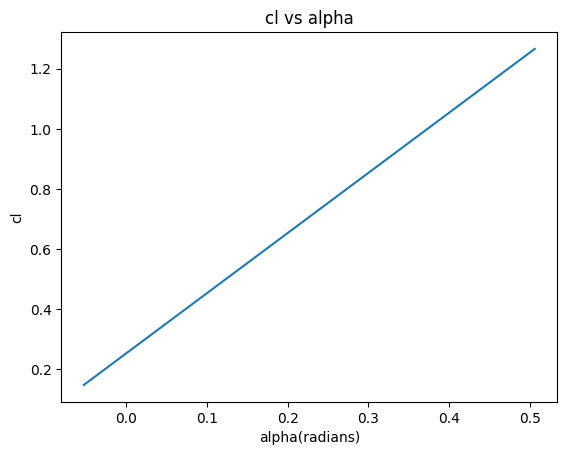

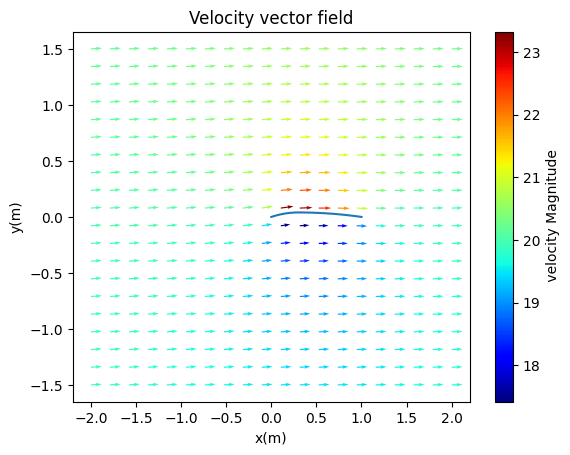

circulation: 5.374572241445458 m^2/s
circulation velocity: 5.502569595868536 m^2/s
cm: [-0.07898370462542015, -0.10639927240622393, -0.1338148401870277, -0.16123040796783145, -0.18864597574863526, -0.21606154352943904, -0.2434771113102428, -0.2708926790910466, -0.2983082468718503, -0.32572381465265415, -0.3531393824334579, -0.38055495021426167, -0.4079705179950654, -0.4353860857758691, -0.46280165355667297, -0.49021722133747675, -0.5176327891182806, -0.5450483568990843, -0.572463924679888, -0.5998794924606918, -0.6272950602414956, -0.6547106280222994, -0.6821261958031032, -0.7095417635839069, -0.7369573313647106, -0.7643728991455143, -0.7917884669263181, -0.819204034707122, -0.8466196024879258, -0.8740351702687296, -0.9014507380495334, -0.9288663058303372, -0.956281873611141]


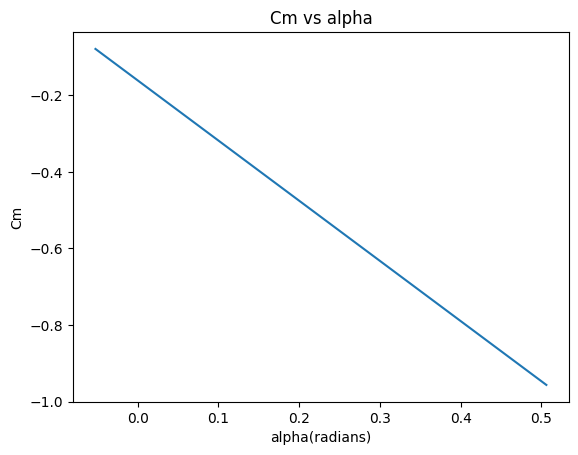

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

o = int(input('NACA 4 DIGIT or NACA 5 DIGIT or polynomial function?, if NACA 4 DIGIT press 1; if NACA 5 DIGIT press 2; if polynomial press 3')) #input as 1 or 2 or 3
# 1 for giving input as 4 digit naca number
# 2 for giving input as 5 digit naca number

#taking input as naca number
if (o == 1): # 4 digit naca number''
  naca_number = list((input('NACA NUMBER:'))) #user input as naca number
  m , p = naca_camber(naca_number) #function call and assign value of m and p
  points = int(input('number of points:'))
  x = np.linspace(1e-10, 1, points)
  yc = pointplot(x , m, p) # generation of camber points by function call

if (o == 2): # 5 digit naca number
  naca_number = list((input('NACA NUMBER:'))) #user input as naca number
  m , p = naca_camber(naca_number) #function call and asign value of m and p
  points = int(input('number of points:'))
  x = np.linspace(1e-10, 1, points)
  k1 = float(input('k1: desired lift coefficient')) # desired lift coefficient
  r = 0.2025 + 0.2*p
  yc = pointplot_5digit(x, k1, r) #generation of camber points by function call

if (o == 3):# random function in terms of x
  expr = input('enter the function in terms of x:') #input of y = f(x)
  points = int(input('number of points:'))
  x = np.linspace(1e-10, 1, points)
  yc = random_function(x, expr) #function call to generate points of y = f(x)


# plot camber point vs x
plt.plot(x, yc)
plt.ylim(0,0.2)
plt.title('Camber plot')
plt.xlabel('chord length (m)')
plt.ylabel('y (m)')
plt.show()

#compute slope
slope = point_slope(x, yc) # function call for slope on camber at each point

#plot slope vs x
plt.plot(x[:-1], slope)
plt.title('Slope plot')
plt.xlabel('x (m)')
plt.ylabel('dy/dx')
print('slope:', slope)

#compute cl and plot
slope_value = slope

theta = np.linspace(1e-10, np.pi, len(slope_value))# range of theta

integral_range = np.linspace( 0, np.pi, len(slope_value)) # integral range for integration

integral_value = trapezoid(np.array(slope_value), integral_range) # computing integration for A0 (integration of slope*dtheta)

integral_value1 = trapezoid(np.array(slope_value)*np.cos(theta), integral_range) # computing integration for A1 (integration of slope*dtheta)


a1 = (2/np.pi)*integral_value1 # a1 = 2/pi * (integration of slope*cos(theta) * dtheta)

alpha = np.arange(-3,30) # angle of attack in radians
target_angle = int(input('angle of attack:')) #targeted angle of attack
for i in range(len(alpha)):
  if (alpha[i] == target_angle):
    index_of_degree = i
    break
alpha = np.deg2rad(alpha) # converting angle of attack to radians

a0 = []
cl = []

for i in range(len(alpha)):
  a0_1 = A0(alpha[i], integral_value) #for each angle of attack
  a0.append(a0_1) # a0 = alpha - integraion of slope* dtheta
  cl_1 = coefficient_of_lift(a0[i], a1) #function call to calculate cl
  cl.append(cl_1) # cl = 2*a0 + a1

#cl value for each angle of attack
print('cl:',cl)

#plot cl vs alpha
plt.figure()
plt.plot(alpha, cl)
plt.title('cl vs alpha')
plt.xlabel('alpha(radians)')
plt.ylabel('cl')

# velocity vector field and computation of circulation
U = 20 # free-stream velocity
a_n = []
integral_value_n = []

for n in range(1, 11): # calculation of a_n for 10 fourier series
     integral_value_n.append(trapezoid(np.array(slope_value)*np.cos(n*theta), integral_range))
     a_n.append((2/np.pi)*np.array(integral_value_n)[n-1])  # a_n = 2/pi * (integration of slope* cos(n* theta)* dtheta)

# meshgrid plotting and scale
mesh_point = int(input('number of mesh points:'))  # user input for number of points on grid
X = np.linspace(-2,2,mesh_point)
Y = np.linspace(-1.5,1.5,mesh_point)
x_plot, y_plot = np.meshgrid(X, Y)

gamma = []

# calculation of circulation distribution function
#circulation distribution value at each point of camber
for i in range(len(x)):
  gamma_value = calculate_gamma(x[i], U, a0, a_n, index_of_degree) # function call for calculating gamma value
  gamma.append(gamma_value)

print(gamma)
# initializing the u and v component
u = U*np.cos(alpha[index_of_degree]) + np.zeros_like(x_plot)
v = U * np.sin(alpha[index_of_degree]) + np.zeros_like(y_plot)

# velocity vector field in x and y direction, induced due to line vortex
u, v = velocity_component(gamma, x, x_plot, y_plot, u, v)
magnitude = np.sqrt(u**2 + v**2) #velocity magnitude

#plot of velocity vector field
plt.figure()
plt.title('Velocity vector field')
plt.plot(x, yc)
plt.quiver(x_plot, y_plot,u, v, magnitude, cmap = 'jet') #velocity vector plot
plt.colorbar(label=' velocity Magnitude')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.show()

#calculation of circulation by integrating vortex filament
circulation_value = circulation(gamma, x) # function call for circulation by gamma
print('circulation:', circulation_value, 'm^2/s')

#let the surface be a circle with centre at 0.5m and radius 3m
r = 3 # radius of the circle taken
u = u.flatten('F') # making the u and v velocity in 1d from 2 dimension
v = v.flatten('F')
theta = np.linspace(0, 2*np.pi, mesh_point*mesh_point)
#calculation of circulation by integrating velocity tangent to the surface
circulation_velocity_value = circulation_velocity(r, u, v, theta) # function call for circulation by velocity
print('circulation velocity:', circulation_velocity_value, 'm^2/s')

cm = []
for i in range(len(alpha)):
  cm.append(-np.pi/2 * (a0[i] + a_n[0] - a_n[1]/2))
print('cm:',cm)
plt.figure()
plt.plot(alpha, cm)
plt.title('Cm vs alpha')
plt.xlabel('alpha(radians)')
plt.ylabel('Cm')
plt.show()